In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_functions import paramagnon, lorz

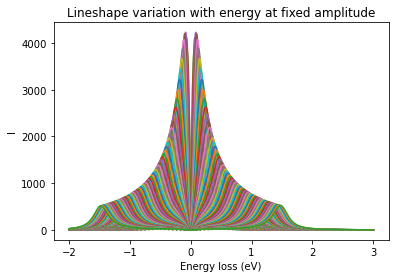

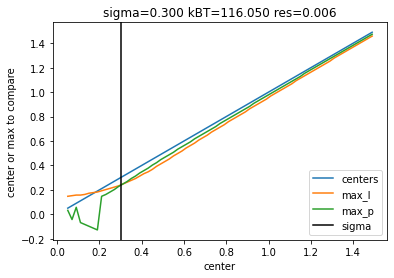

In [2]:
x = np.linspace(-2, 3, 1000)
amplitude = 1
sigma = .3
res = 0.01/2*np.sqrt(2*np.log(2))
kBT = 0.01/8.617e-5

fig, ax = plt.subplots()

centers = np.arange(0.05, 1.5, 0.02)
max_p = []
max_l = []
for center, i in zip(centers, range(len(centers))):
    y = paramagnon(x, amplitude=amplitude, center=center, sigma=sigma, kBT=kBT, res=res)
    ax.plot(x, y, color=f'C{i}', label=f'center={center:.2f} eV')
    max_p.append(x[np.argmax(y)])
    
    y = lorz(x, amplitude=amplitude, center=center, sigma=sigma, kBT=kBT, res=res)
    ax.plot(x, y, ':', color=f'C{i}')
    max_l.append(x[np.argmax(y)])


ax.set_title('Lineshape variation with energy at fixed amplitude')
ax.set_xlabel('Energy loss (eV)')
ax.set_ylabel('I')
#ax.legend()

fig, ax = plt.subplots()
ax.plot(centers, centers, label='centers')
ax.plot(centers, max_l, label='max_l')
ax.plot(centers, max_p, label='max_p')
ax.axvline(sigma, color='k', label='sigma')
ax.set_title(f'sigma={sigma:.3f} kBT={kBT:.3f} res={res:.3f}')
#ax.axvline(res, color='darkgreen', label='res')

ax.set_xlabel("center")
ax.set_ylabel("center or max to compare")
ax.legend()
fig.savefig('different_peaks.pdf')

/Users/markdean/Documents/programs/check_fit/analysis_functions.py:22: RuntimeWarning: overflow encountered in exp
  return np.real(1./ (1 - np.exp(-x / (kBT)) +0.001*1j ))
/Users/markdean/Documents/programs/check_fit/analysis_functions.py:22: RuntimeWarning: overflow encountered in exp
  return np.real(1./ (1 - np.exp(-x / (kBT)) +0.001*1j ))


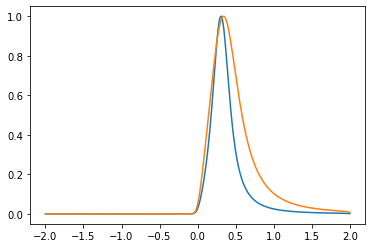

In [3]:
x = np.linspace(-2, 2, 1000)
center = 0.33
amplitude = 1
sigma = .25  #HWHM
res = 0.085/(2*np.sqrt(2*np.log(2)))
kBT = 20*8.617e-5

fig, ax = plt.subplots()

y = paramagnon(x, amplitude=amplitude, center=center, sigma=sigma, kBT=kBT, res=res)
ax.plot(x, y/y.max(), label='DHO')

y = lorz(x, amplitude=amplitude, center=center, sigma=sigma, kBT=kBT, res=res)
ax.plot(x, y/y.max(), label='antisym lorz')
